<a href="https://colab.research.google.com/github/ZahraVakil/edunat_Internship-/blob/main/SentimentalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  #linear algebra
import pandas as pd #data preprocessing, csv to df

Exploratory data analysis
load and prepare data

In [2]:
#loading dataset

data = pd.read_csv('/Restaurant_Reviews.csv')

In [3]:
# shape= tupple of array dimension (row, column)

data.shape

(1000, 2)

In [4]:
#returns the label of each colm

data.columns


Index(['Review', 'Liked'], dtype='object')

In [5]:
#view the data

data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
#information of dataframe

data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

Data Preprocessing

In [7]:
#importing essential Libraries for performing NLP processing

import nltk
import re #python library for regular expression
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
#cleaning the reviews
corpus = []

for i in range(0,1000):  #1000 records
  #cleaning special char from the reviews
  #the re.sub() method performs global search and global replave in given string

  review = re.sub(pattern='[^a-zA-Z]', repl =' ', string=data['Review'][i])

  #converting the entire review in loweer case
  review = review.lower()

  #Tokenizing review by words
  review_words = review.split()

  #removing stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  #stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  #joining the stemmed words
  review = ' '.join(review)

  #creting a corpus
  corpus.append(review)




In [9]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [10]:
#feature extraction
#creating bag of words model
from sklearn.feature_extraction.text import CountVectorizer    #method to convert text to numbers
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values


SPLIT DATA ---- into training and testing

In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split (X, y, test_size= 0.20, random_state=0)

#random_state simply sets seed to the random geneartor

#Training (1000,1500)
#1000*80/100 =800
#1000*20/100 =200

In [12]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

MODEL TRAINING -- MULTINOMIAL NAIVE BAYES

In [13]:
#fitting naive bayes to training set

from sklearn.naive_bayes import MultinomialNB
#suitable for classification of discrete features (word counts for text classs)

classifier = MultinomialNB()
classifier.fit(X_train,y_train)


MultinomialNB()

In [14]:
#predicting test set results
y_pred = classifier.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [17]:
#accuracy, precision and recall

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)

print(score1*100)
print(score2*100)
print(score3*100)


76.5
76.41509433962264
78.64077669902912


In [18]:
#making confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


Text(95.72222222222221, 0.5, 'Actual value')

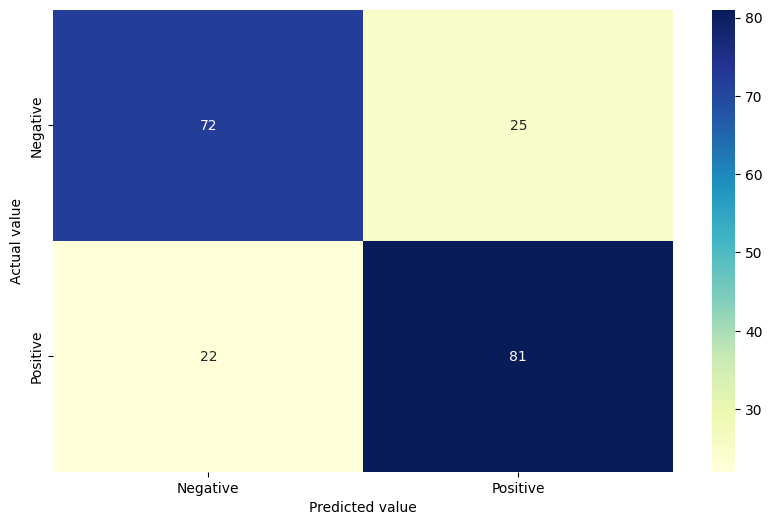

In [19]:
#plotting confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap ="YlGnBu", xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

Predictions

In [21]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern = '[a-zA-Z]', repl=' ', string = sample_review)
  sample_review = sample_review.lower()

  sample_review_words = sample_review.split()

  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]

  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]

  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)



In [23]:
#predicting values

sample_review = 'the food is really disgusting.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE REVIEW')
else:
  print('This is NEGATIVE review')


This is NEGATIVE review


In [26]:
#predicting values

sample_review = 'the food was wonderfull.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE REVIEW')
else:
  print('This is NEGATIVE review')


This is NEGATIVE review
